In [29]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Extracting GLCM features

Energy
[0.03212519 0.03038586 0.03457699 0.03012517 0.0269988  0.03038586
 0.02884733 0.03012517 0.02515278 0.02640066 0.0269194  0.02594759]
Correlation
[0.99159036 0.98922846 0.99359272 0.98860316 0.98162389 0.98922846
 0.98613045 0.98860316 0.97282306 0.97858162 0.98009318 0.97674074]
contrast
[18.10169763 23.25401677 13.78287156 24.60393332 39.69729328 23.25401677
 29.92185489 24.60393332 58.9217841  46.54060141 43.07011555 50.54068257]
homogeneity
[0.29308294 0.26456691 0.33081454 0.26170785 0.21487723 0.26456691
 0.24416878 0.26170785 0.18584213 0.20467961 0.21167947 0.19688713]


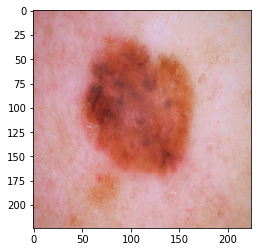

In [67]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
img = cv2.imread("./train/original/malignant/700.jpg") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
from xtract_features.glcms import *
feats = glcm(img)

# energy
energy = feats.energy()
print("Energy")
print(energy)
# correlation
corr = feats.correlation()
print("Correlation")
print(corr)
# contrast
cont = feats.contrast()
print("contrast")
print(cont)
# homogeneity
homogeneity = feats.homogeneity()
print("homogeneity")
print(homogeneity)
# all the features at once
_all = feats.glcm_all()


In [68]:
# Extracting Region Properties

 Max Area :
15


0.8835161375678741

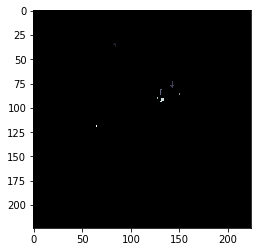

In [69]:
from xtract_features.region_props import *
_rp = region_props(img)
# maximum area region
max_area = _rp.max_area()
print (" Max Area :")
print(max_area)
# plot regions
_rp.plot_image()
# plot black and white
_rp.plot_show_bw()
# plot with lables
_rp.plot_image_with_label()
# mean of areas of all the regions
_rp.mean_area()
# eccentricity of the highest area region
_rp.eccentricity()

In [70]:
# Entropy

In [34]:
from xtract_features.extract import s_entropy, entropy_simple
# shannon's entropy
s_entr = s_entropy(img)
# simple entropy
entr_simp = entropy_simple(img)
print("shannon's entropy")
print(s_entr)
print("simple entropy")
print(entr_simp)

shannon's entropy
6.190005607197935
simple entropy
4.290584934279499


# Adding Noise

In [35]:
from skimage.util import random_noise
import cv2
import numpy as np

In [36]:
# Load the image and add noise
for  i in range(1,1440):
    filename=str(i)
    img=cv2.imread("./train/original/benign/"+filename+".jpg")
    noise_img = random_noise(img, mode='s&p',amount=0.05)
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    cv2.imwrite('train/noise/benign/'+filename+".jpg",noise_img)
    
# Load the image and add noise
for  i in range(1,1198):
    filename=str(i)
    img=cv2.imread("./train/original/malignant/"+filename+".jpg")
    noise_img = random_noise(img, mode='s&p',amount=0.05)
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    cv2.imwrite('train/noise/malignant/'+filename+".jpg",noise_img)
 



# Applying filter

In [37]:
# Load the image and add noise
for  i in range(1,1440):
    filename=str(i)
    img=cv2.imread("train/noise/benign/"+filename+".jpg")
    img= cv2.medianBlur(img,3)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    value =30
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    cv2.imwrite('train/filtered/benign/'+filename+".jpg",img)

# Load the image and add noise
for  i in range(1,1198):
    filename=str(i)
    img=cv2.imread("train/noise/malignant/"+filename+".jpg")
    img= cv2.medianBlur(img,3)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    value =30
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    cv2.imwrite('train/filtered/malignant/'+filename+".jpg",img)
 



In [38]:
# width,height,channels
image_shape = (224,224,3)
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [39]:
#Data preparation - image (normalisng)
#using datagenerator Api
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               rescale=1/255, # Rescale the image by normalzing it.
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

# Creating the Model - CNN


In [40]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [41]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())


model.add(Dense(256))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer only one dense, remember its binary, 0=Benign , 1=Malignant
model.add(Dense(1))
model.add(Activation('sigmoid'))

#loss fn  -  binar_crossentropy bcs 0 or 1 prediction 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W1106 20:53:09.166157  5124 deprecation_wrapper.py:119] From C:\Users\UNKNOWN\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1106 20:53:09.651682  5124 deprecation_wrapper.py:119] From C:\Users\UNKNOWN\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1106 20:53:09.763772  5124 deprecation_wrapper.py:119] From C:\Users\UNKNOWN\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1106 20:53:09.836361  5124 deprecation_wrapper.py:119] From C:\Users\UNKNOWN\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1106 20:53:09.853318  5124 deprecation_wrapper.py:119] From C:\Users\U

In [42]:
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x0000025ABD888F60>>

### Training the Model

In [43]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('../skin-cancer-malignant-vs-benign/train/original',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 2643 images belonging to 2 classes.


In [44]:
test_image_gen = image_gen.flow_from_directory('../skin-cancer-malignant-vs-benign/test/original',
                                                 target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')


Found 660 images belonging to 2 classes.


In [45]:
train_image_gen.class_indices

{'benign': 0, 'malignant': 1}

In [46]:
#the number of samples processed for each epoch is batch_size * steps_per_epochs
results = model.fit_generator(train_image_gen,epochs=50,
                              steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12,
                             )

Epoch 1/50
50/50 [==============================] - 49s 981ms/step - loss: 0.6713 - acc: 0.5650 - val_loss: 0.6941 - val_acc: 0.4844
Epoch 2/50
50/50 [==============================] - 44s 883ms/step - loss: 0.6960 - acc: 0.4788 - val_loss: 0.6946 - val_acc: 0.4635
Epoch 3/50
50/50 [==============================] - 43s 860ms/step - loss: 0.6932 - acc: 0.5012 - val_loss: 0.6896 - val_acc: 0.5677
Epoch 4/50
50/50 [==============================] - 42s 843ms/step - loss: 0.6875 - acc: 0.5796 - val_loss: 0.6887 - val_acc: 0.5500
Epoch 5/50
50/50 [==============================] - 44s 874ms/step - loss: 0.6876 - acc: 0.5275 - val_loss: 0.6189 - val_acc: 0.5417
Epoch 6/50
50/50 [==============================] - 45s 892ms/step - loss: 0.6165 - acc: 0.5687 - val_loss: 0.6944 - val_acc: 0.4740
Epoch 7/50
50/50 [==============================] - 40s 807ms/step - loss: 0.6938 - acc: 0.4895 - val_loss: 0.6913 - val_acc: 0.5833
Epoch 8/50
50/50 [==============================] - 51s 1s/step - los

In [47]:
import numpy as np
print(np.mean(results.history['acc']))
print(np.mean(results.history['val_acc']))
print(np.mean(results.history['loss']))
print(np.mean(results.history['val_loss']))


0.5438156607513658
0.5424583333333333
0.6877029220932017
0.6880153017905024


# Evaluating the Model

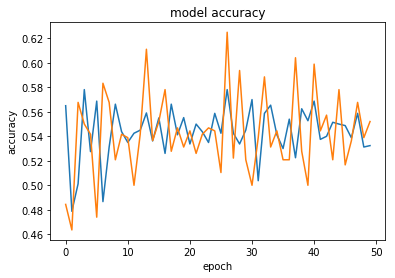

In [48]:
import matplotlib.pyplot as plt
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

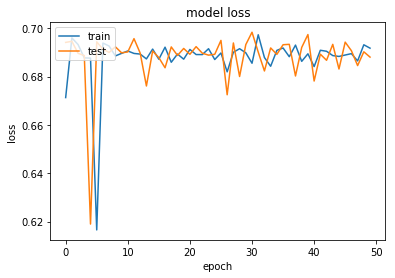

In [49]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predicting on new images

In [53]:
from keras.models import load_model
model = load_model('./model.h5')
# summarize model.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
__________

In [54]:
train_image_gen.class_indices

{'benign': 0, 'malignant': 1}

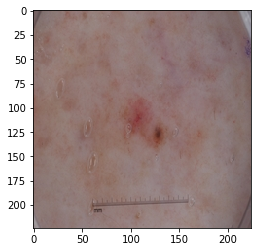

In [64]:
import numpy as np
from keras.preprocessing import image

file = '../skin-cancer-malignant-vs-benign/test/original/malignant/102.jpg'

img = image.load_img(file)
plt.imshow(img)
img = image.img_to_array(img)
img = img/255
img = img.reshape(1,224,224,3)



In [65]:
prediction_prob = model.predict(benign_img)

In [66]:
# Output prediction
print(f'{prediction_prob} ')

[[0.9348409]] 
